# PART4 컴퓨터비전

- Computer Vision  
: 이미지뿐 아니라 비디오 등과 같은 모든 task 포함.
- 컴퓨터 비전 task에 모델을 적용하려면 딥러닝 모델 중 __CNN__을 사용해야 한다.  
    => CNN은 이미지의 feature를 잘 뽑을 수 있도록 특화돼 있는 모델이기 때문

## 1. Convolutional Neural Network (CNN)

- Region Feature(=Graphical Feature) (지역 정보)  
> 이미지 픽셀을 flatten해서 사용하면 input 변수들의 위치 정보를 전혀 반영하지 못한다.  
> 이러한 __지역 정보__를 학습할 수 있는 신경망 구조를 __CNN__이라고 한다.  

- CNN  
> 지역 정보를 학습시키기 위한 신경망 모형.  
> Yann LeCun 교수가 1998년 제안. -> 주목 x  
> -> 2010년대에 들어 알고리즘, 하드웨어의 발전으로 CNN이 이미지를 처리하는 신경망 모형으로 급부상.  
> 구성 : 'Region Feature를 뽑아내는 __Convolution Layer__' + 'Feature Dimension을 위한 __Pooling Layer__' + '최종적인 분류를 위한(일반적인 MLP 구조) __FCN__'

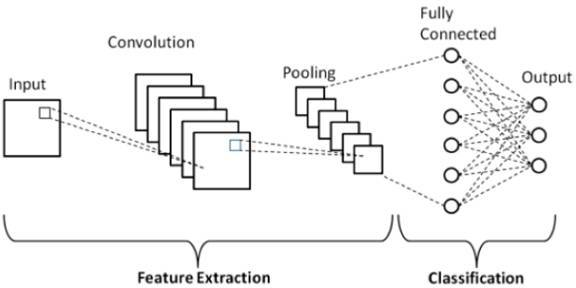

In [1]:
from IPython.display import Image
Image(filename='1.jpeg', width=300)
# https://muzukphysics.tistory.com/195

- Convolution Layer  
: receptive field를 정의해 입력층의 이미지의 feature를 추출하는 역할 담당  
: 이미지가 input으로 들어왔을 때 사각형 모양의 receptive field가 이미지를 스캔하면서 이미지의 region feature를 추출  
: 이때 '이미지 픽셀 값'과  'receptive field의 weight'와의 선형 결합으로 1개의 값이 나옴.  
: conv layer의 입출력 데이터를 feature map이라고 함.  
: CNN 학습은 이미지를 잘 분류할 수 있도록 feature를 추출해내는 weight를 학습시키는 것.

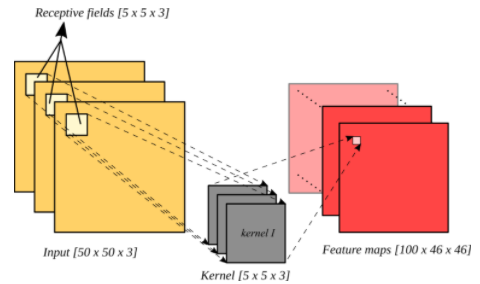

In [2]:
Image(filename='2.png', width=400)
# https://velog.io/@kgh732/%EB%B6%80%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%94%84-AI-Tech-U-stage.-3-3

- stride  
: conv layer에서 receptive field가 이미지를 돌면서 feature를 뽑을 때 이동하는 칸 수를 의미.

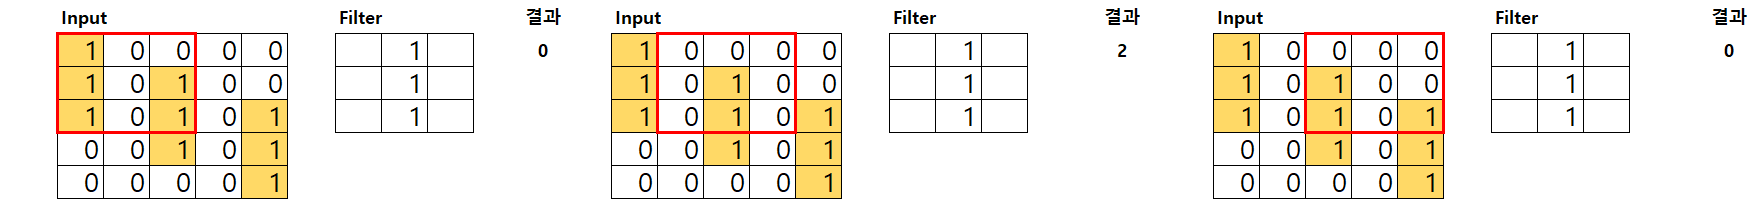

In [3]:
Image(filename='3.png', width=700)
# https://taeu.github.io/cs231n/deeplearning-cs231n-CNN-1/

-> stride=1인 경우

- padding  
: 일반적인 conv 연산을 적용하면 다음 image 또는 feature의 __size가 줄어들고__, __가장자리에 있는 픽셀 값__은 안쪽에 있는 픽셀 값보다 __적게 conv연산이 적용__되는 단점이 있음.  
: image __size를 줄이지 않고 모든 픽셀 값에 conv 연산을 적용__하기 위해 padding이라는 개념 도입!  
: 기본 이미지 사이즈의 테두리에 0값을 넣어 이미지 __사이즈 유지__ & 테두리에 있는 픽셀 값도 안에 있는 픽셀 값과 __똑같이 conv 연산__을 거치도록 하는 것.

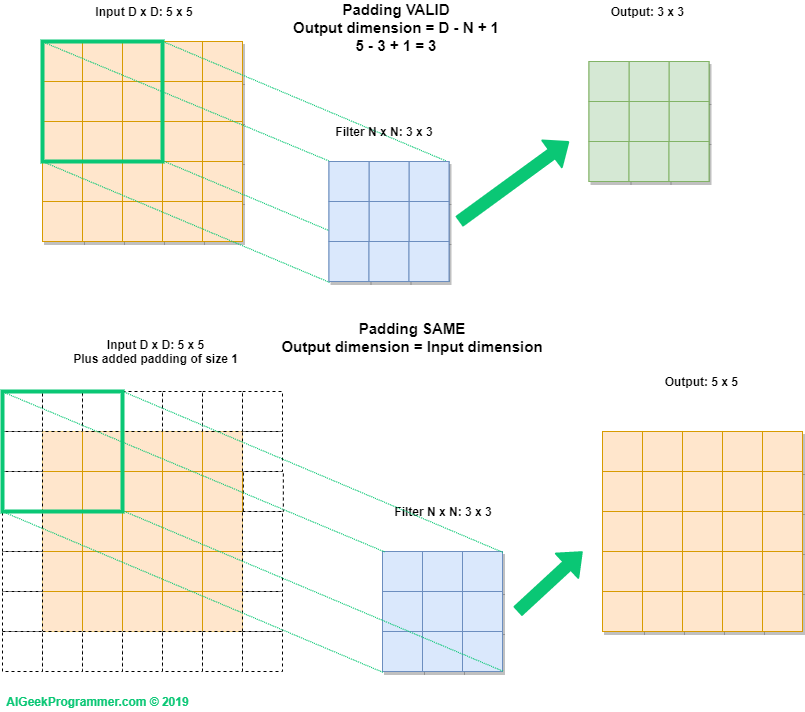

In [4]:
Image(filename='4.png', width=400)
# https://aigeekprogrammer.com/convolutional-neural-network-image-recognition-part-2/

- weight sharing  
: 많은 파라미터의 수를 줄이기 위한 기법  
: 말 그대로 weight를 공유하는 개념으로, 한 이미지에서 receptive field를 옮길 때마다 같은 weight를 사용.

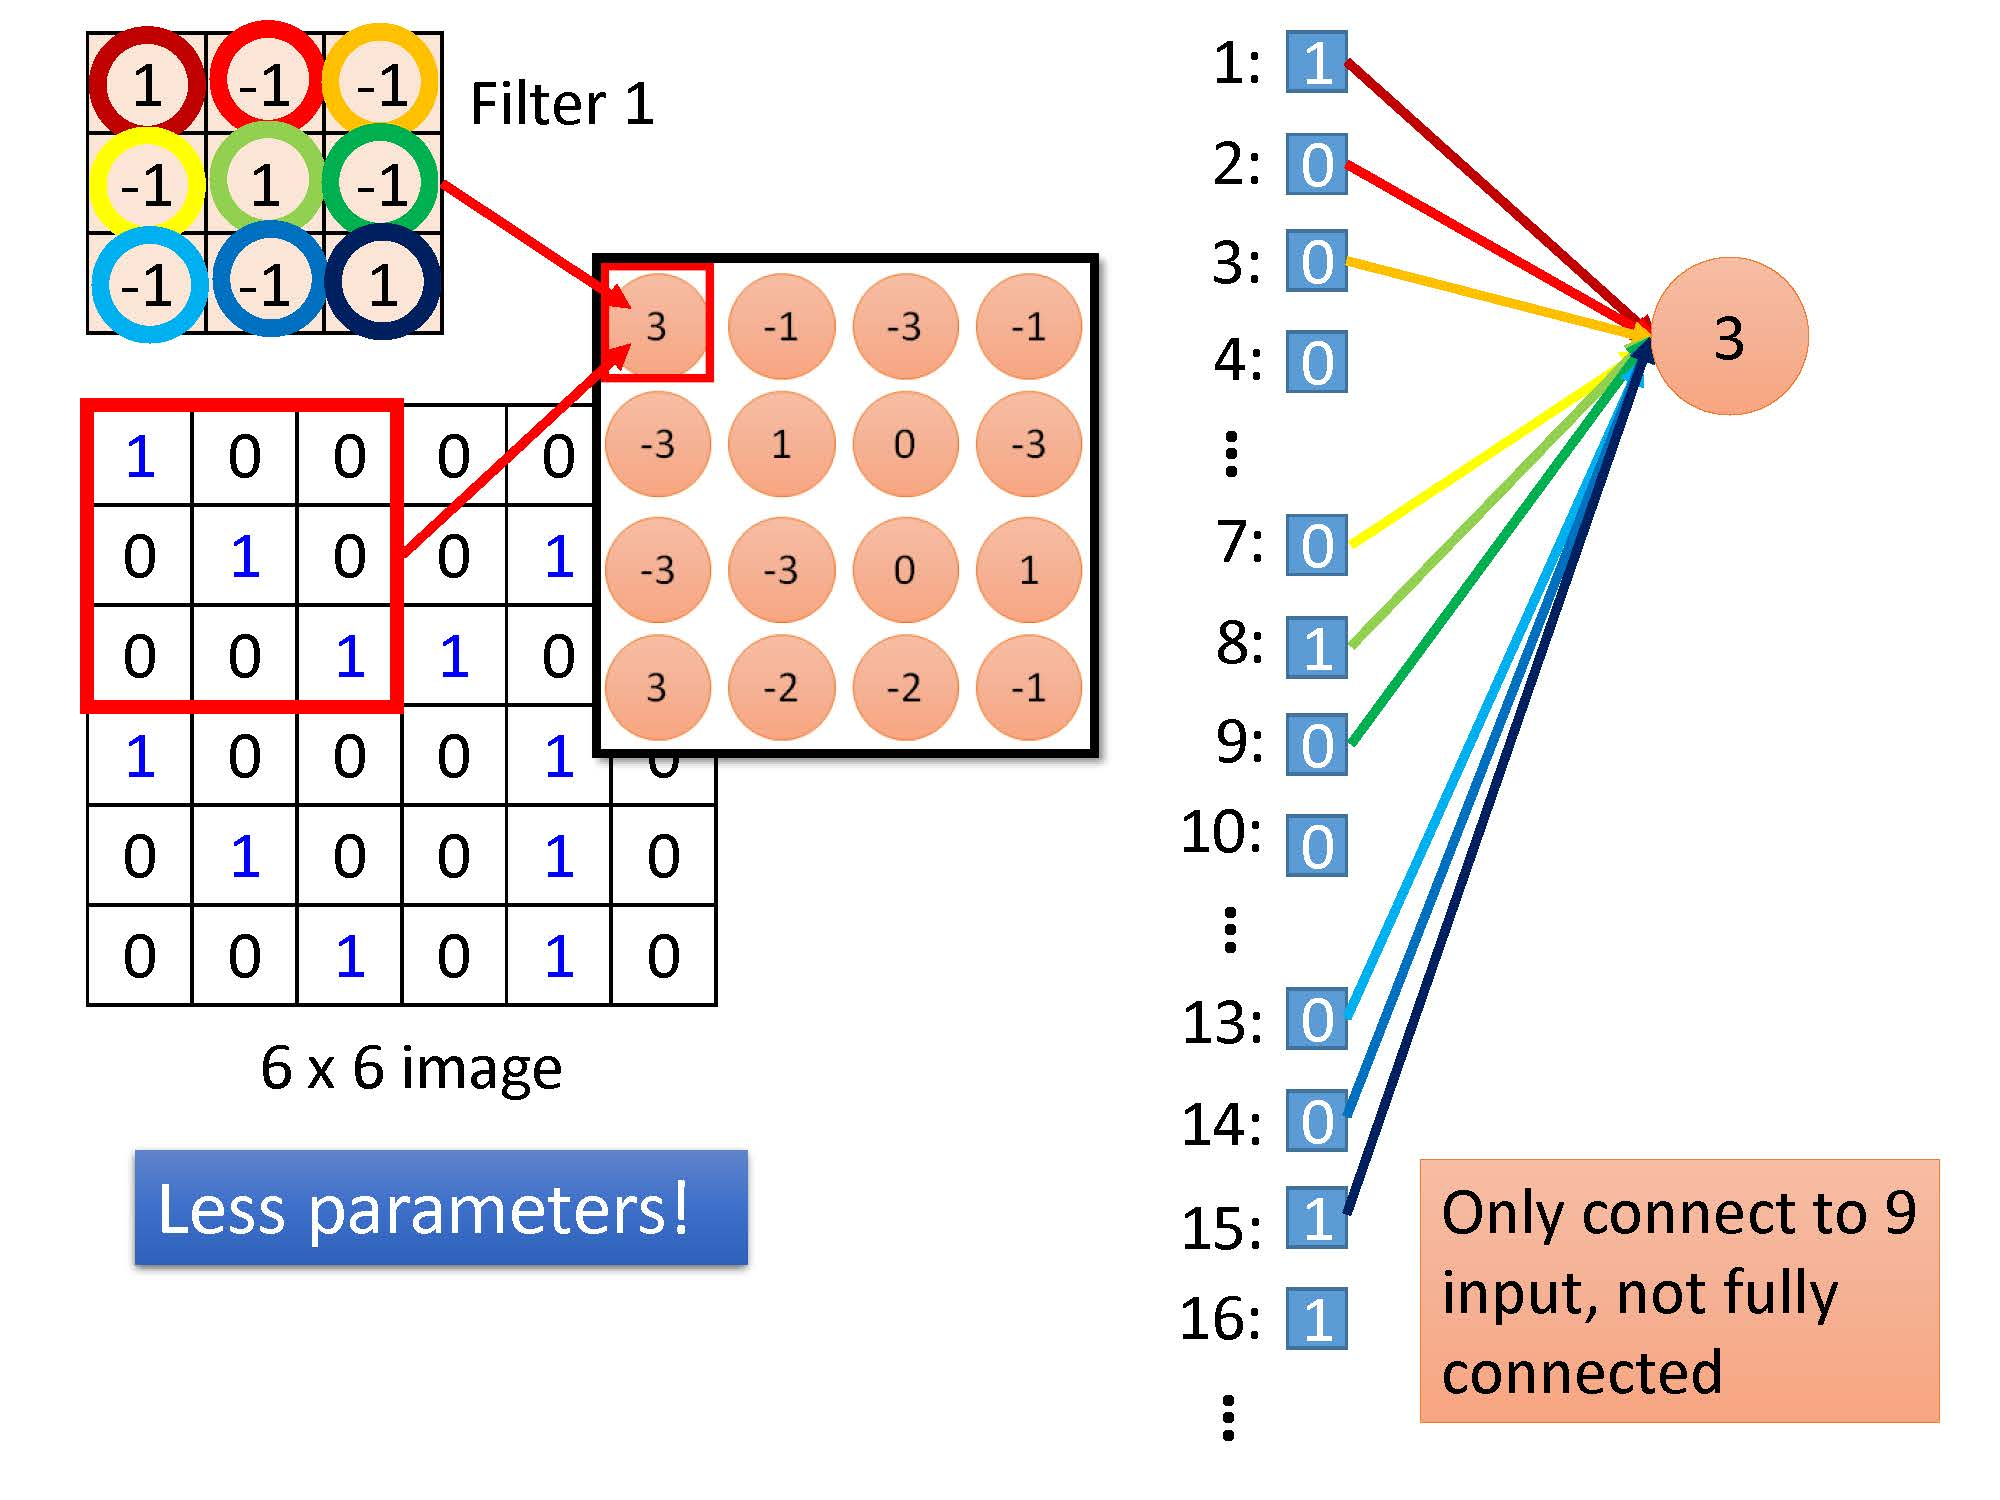

In [5]:
Image(filename='5.jpeg', width=300)
#https://www.programmersought.com/article/22603430329/

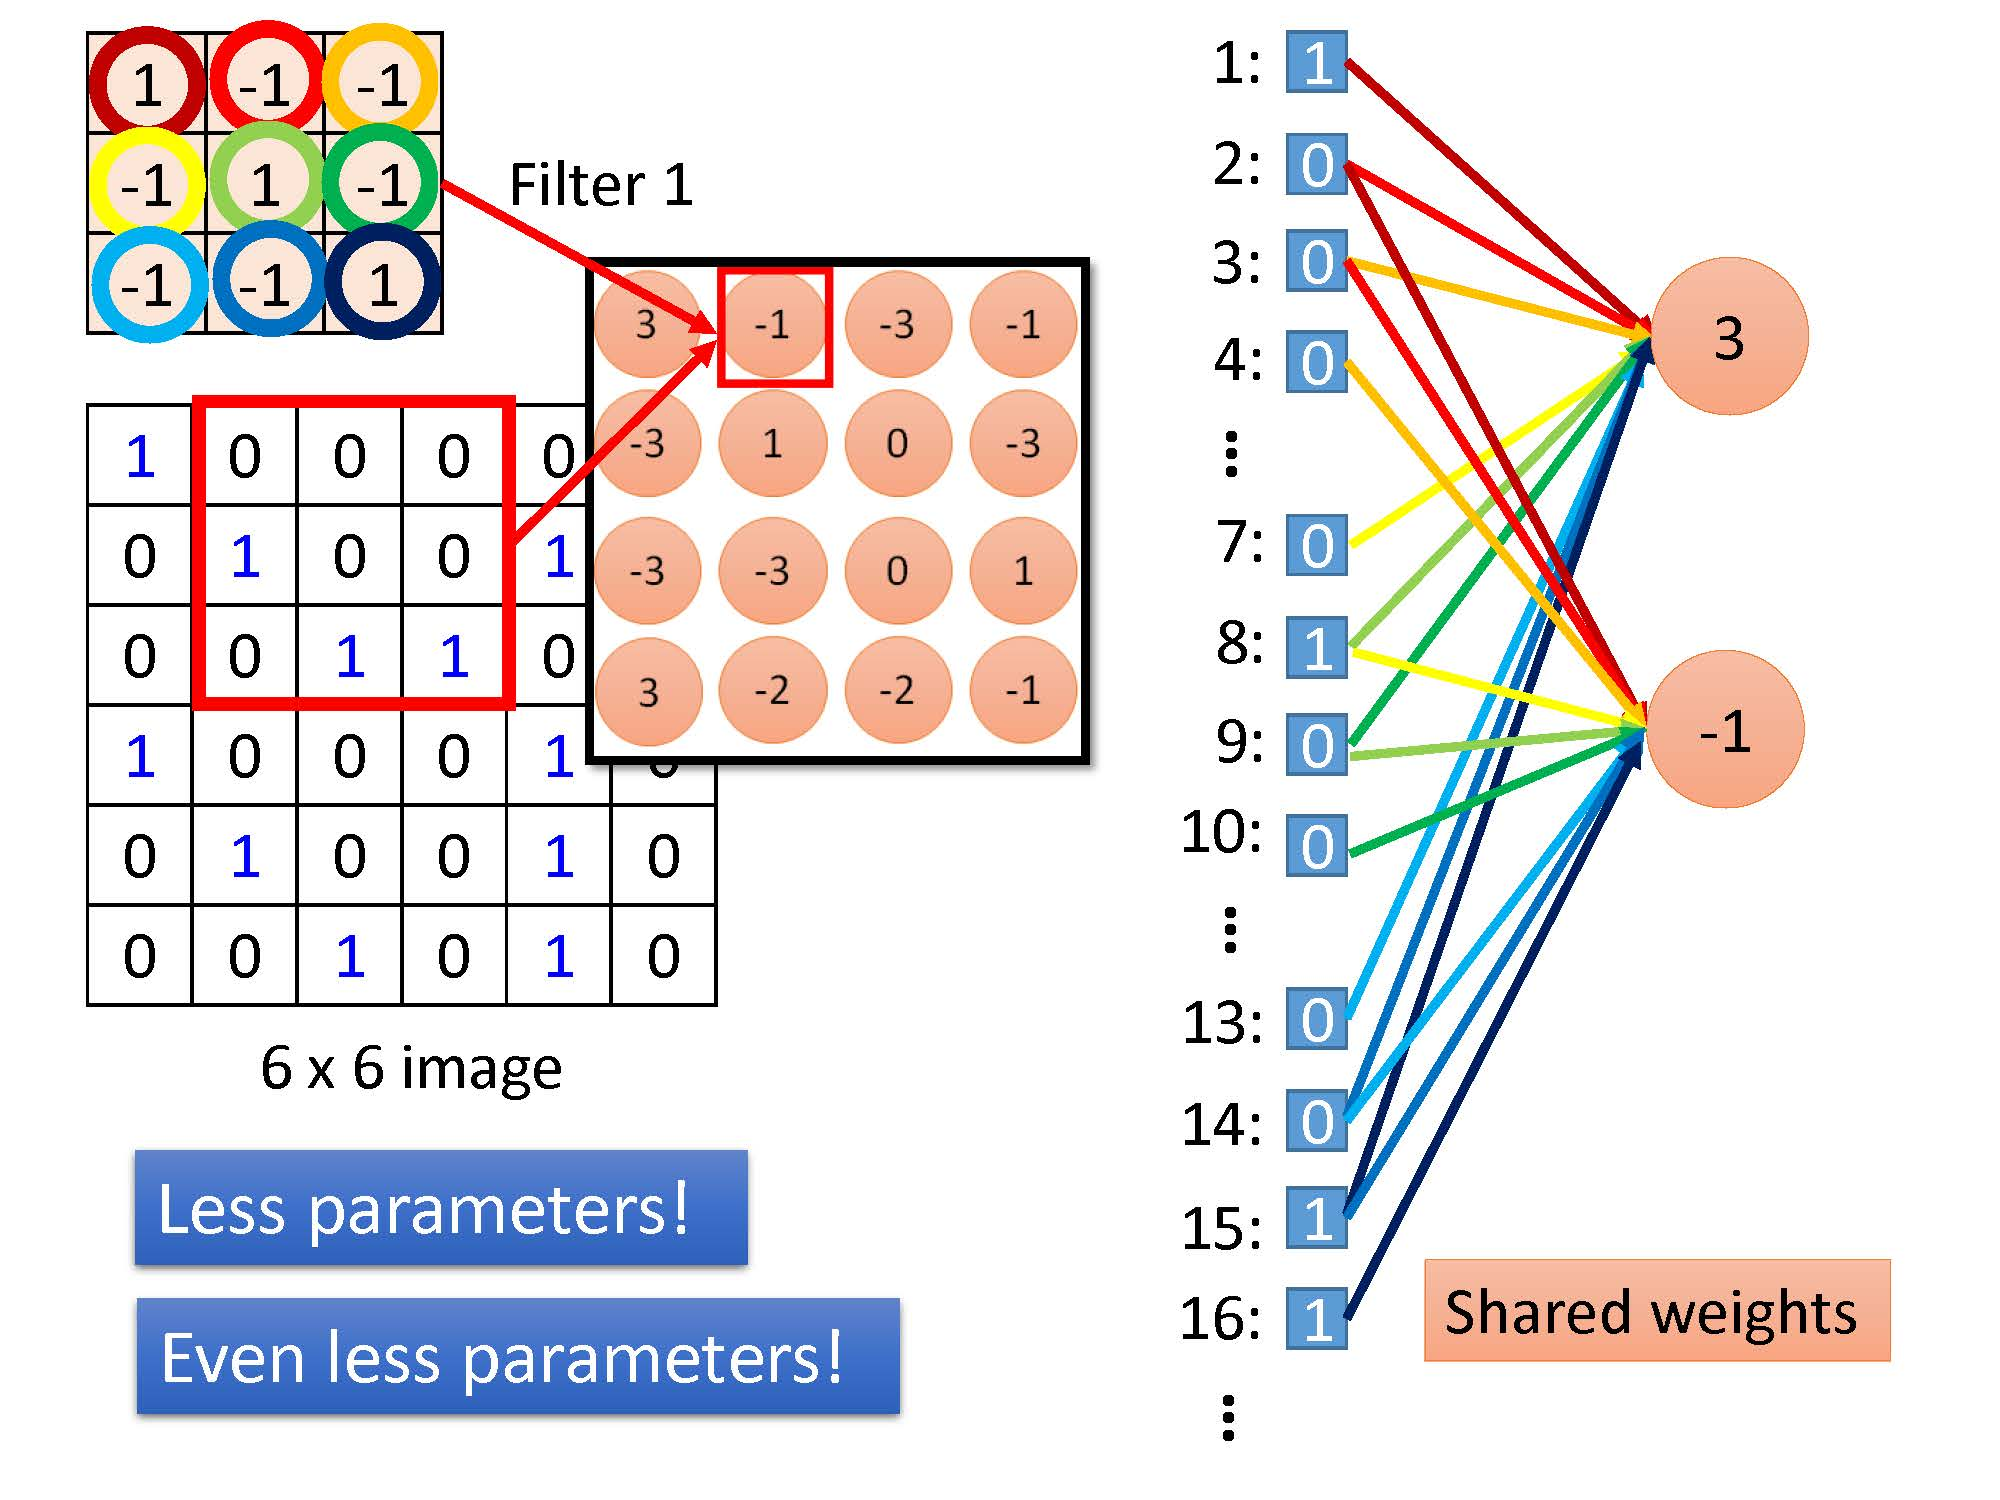

In [6]:
Image(filename='6.jpeg', width=300)
#https://www.programmersought.com/article/22603430329/

- pooling layer  
: 일반적으로 image 또는 feature의 conv 연산을 거친 후 pooling layer를 거친다.  
: 'pooling'이라는 개념은 feature size를 1/2로 줄여주는 것이다.  
: pooling layer를 거치지 않으면 많은 파라미터를 학습시켜야 하기 때문에 학습 시간이 오래 걸릴 수 있다.  
: 즉, pooling layer의 개념은 CNN의 학습 속도를 향상시키기 위해 feature의 dimension을 줄이는 개념.  
: 하지만 정보의 손실이 있을 수밖에 없다. 직관적으로 생각해보면 pooling layer를 거치지 않을 경우 더 많은 feature를 학습시킬 수 있는 장점이 있음. -> 최근에는 상황에 따라 생략하기도 함.

- Fully Connected Layer  
: 일반적인 MLP 구조와 동일.

## 2. CNN과 MLP

- 이미지를 분류하는 모델을 만들고자 할 때 CNN과 MLP의 가장 큰 차이점은 __이미지의 feature를 어떻게 추출하느냐__에 있다.
- MLP는 이미지의 픽셀 값을 바로 네트워크의 input으로 사용하는 것.  
- CNN은 이미지의 region feature를 conv layer와 pooling layer를 이용해 추출하고 그 feature를 MLP의 input으로 사용하는 것.
- <span style="color:blue">CNN이 이미지 처리와 관련된 vision 쪽에서 성능이 좋은 이유는 단지 __region feature를 추출__할 수 있기 때문인 것이다.</span>
- 딥러닝은 새로운 모델이라기보다 __graphical feature를 추출하는 것에 초점을 맞춘 모델__이며, 모델을 만들 때는 feature가 매우 중요하다는 사실을 알 수 있다.

- conv 연산 하는 이유?  
: 이미지 내 주변 픽셀과의 조합을 통한 특징을 추출하기 위해
- convolution을 이용해 추출된 feature map  
: 기존 이미지에서 주변 정보를 수많은 파라미터 값을 이용해 반영된 결괏값  
: 따라서 다양한 conv 연산을 이용해 생성된 feature map의 결과는 __1차원으로 펼쳐도 이미 주변 정보를 반영한 결괏값으로 존재__하기 때문에 기존에 문제였던 MLP의 한계를 해결할 수 있음.

## 3. Data Augmentation

- CNN을 포함한 딥러닝 모델은 graphical feature를 학습시키는 것이 주목적, 대부분 복잡한 문제 풀기 위한 복잡한 모델
- 복잡한 모델을 만들기 위해서는 __다량의 데이터 필요__
- 우리가 갖고 있는 데이터는 한정적이기 때문에 이를 보완하기 위한 방법이 __data augmentation__
- __data augmentation__  
: 데이터를 임의로 변형해 데이터의 수를 늘려 다양한 feature를 뽑는 방법  
: 사람의 눈으로 봤을 때 동일한 클래스로 분류할 수 있는 수준의 변형을 가함.  
: 일반적으로 이미지 분류 문제에서 data augmentation을 할 경우에 성능이 소폭 상승한다고 알려져 있다.
- (참고) https://nittaku.tistory.com/272  


- <<span style="color:blue">__data augmentation 종류__</span>>  
1. <span style="color:blue">random flip / rotation / crop / scaling (기본적으로 많이 사용하는 기법들)</span>  
- random flip : 이미지를 랜덤하게 좌우, 상하 반전
- rotation : 이미지 회전  
- crop : 이미지의 일정 부분 잘라 사용하는 기법
- scaling : 이미지를 확대 또는 축소 시키는 기법

2. <span style="color:blue">cutout / cutmix (비교적 최근에 제안된 기법들)</span>
- cutout : 이미지의 일부를 사각형 모양으로 검은색 칠하는 기법, 숫자로는 0을 채워 넣는 것이라 생각. 일종의 input 데이터에 대해 dropout을 적용한 기법이라 이해하면 됨.  
- cutmix : 두 이미지를 합쳐 놓고 이미지의 label을 학습시킬 때 각각의 이미지가 차지하는 비율만큼 학습시키는 방법.  

=> cutout, cutmix 모두 일반적인 이미지 분류 문제에서 data augmentation보다 성능이 뛰어나다는 것이 논문을 통해 밝혀짐.
         

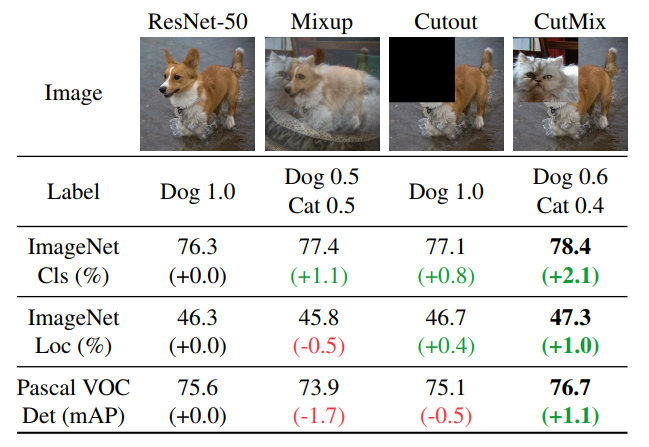

In [7]:
Image(filename='1.png', width=400)
# https://arxiv.org/pdf/1905.04899v1.pdf